# Books Recommendation System

## Introduction

A machine learning-based tool called the Books Recommendation System was created to help consumers find new books based on their likes and interests. Finding books that suit individual reading preferences might be difficult in today's society because there are so many books accessible. This recommendation system's goal is to give readers personalised book suggestions that will help them discover more books they would like and improve their reading experience as a whole. An overview of the Books Recommendation System, including its goal, approach, and distinguishing characteristics, is the goal of this paper. It will look into the fundamental formulas and methods employed to produce precise and pertinent book suggestions.

## Research Question

The main goal of this project is to develop such an intelligent system which can recommend the books to the users based on their preferences and interest. To make the people more satisfying and engaged. With the help of this system, the users will be able to choose the books of their interest.

### Dataset

The dataset has been taken from the Kaggle website and it contains three csv files e.g. Books, users and ratings data. 

In [178]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import books dataset
books = pd.read_csv('Books.csv')
#Import ratings Dataset
ratings = pd.read_csv('Ratings.csv')
#Import users dataset
users = pd.read_csv('Users.csv')



/var/folders/qs/7h062p450sdb_ncy2h6f4_3c0000gq/T/ipykernel_18892/3936091610.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [179]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [180]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [181]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.000
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.000
4,5,"farnborough, hants, united kingdom",NaN


## Preliminary Analysis of the data

In the preliminary analysis, we get the idea about the how many books we have and the number of users and the ratings we have. For each user, we have 11 ratings. The numbers in which users can rate between are from 0 to 10.

For the books dataset, we have almost 271360 books record and their description is mentioned in different columns e.g. 'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'.

For the users dataset, we have almost 278858 users dataset and their 'User-ID', 'Location' and 'Age' is mentioned in it.

For the ratings dataset, we have 527556 ratings of the books and 'User-ID', 'ISBN', and 'Book-Rating' is mentioned in it.

In [182]:
# Print out the number of users, movie titles and ratings
print('The books dataset contains',len(books),'books')
print('The ratings dataset contains', len(ratings["User-ID"].unique()), 'users,',len(ratings['User-ID'].unique()),'books and',len(ratings),'ratings.')

The books dataset contains 271360 books
The ratings dataset contains 105283 users, 105283 books and 1149780 ratings.


In [183]:
print('This is an average of', round(len(ratings)/len(ratings["User-ID"].unique())), 'ratings per user.')

This is an average of 11 ratings per user.


In [184]:
# Get unique values for ratings
print('Users can rate books as:',sorted(ratings["Book-Rating"].unique()))

Users can rate books as: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [185]:
# Shape and columns of the books dataset 
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [186]:
# Shape anf columns of the users dataset
print(users.shape)
print(list(users.columns))

(278858, 3)
['User-ID', 'Location', 'Age']


In [187]:
# Shape and columns of the ratings dataset
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['User-ID', 'ISBN', 'Book-Rating']


### Data Cleaning steps

In [188]:
# Checking the sum of the null values in the books dataset
books.isnull().sum()


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [189]:
# Checking the sum of null values in users dataset
users.isnull().sum()


User-ID          0
Location         0
Age         110762
dtype: int64

In [190]:
# Checking the null value sin the ratings dataset
ratings.isnull().sum()


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

It can be seen from the above three cells that books dataset has some null values but their effect is negligible. 
In the users dataset, there is large null values in age column, we cannot use much this column in this analysis. There is no null values in ratings column.

In [191]:
# Duplicated values in the books dataset
books.duplicated().sum()


0

In [192]:
# Duplicated values in the users data
users.duplicated().sum()


0

In [193]:
# Duplicates values in the ratings data
ratings.duplicated().sum()


0

## Exploratory Data Analysis

After the cleaning process, the data has been explored in the different ways through graphs.

In the first way, ratings distribution has been observed and their counts. Most of the books have zero ratings.

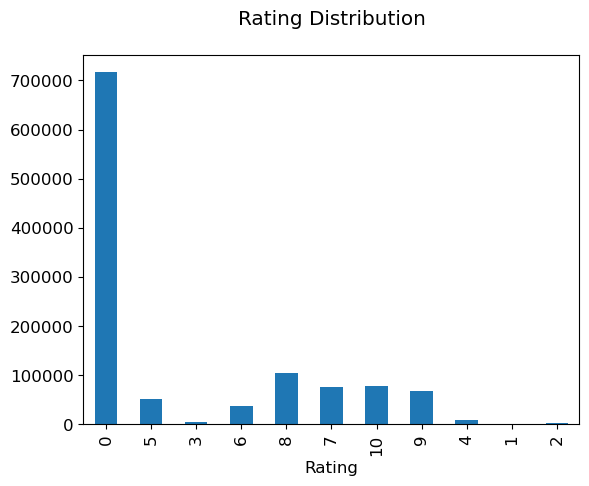

In [194]:
plt.rc("font", size=12)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.show()

In the plot below, it basically shows the distribution of age which gives more number of ratings. It can be shown from the graph that people from 20 to 40 have given more number of ratings. 

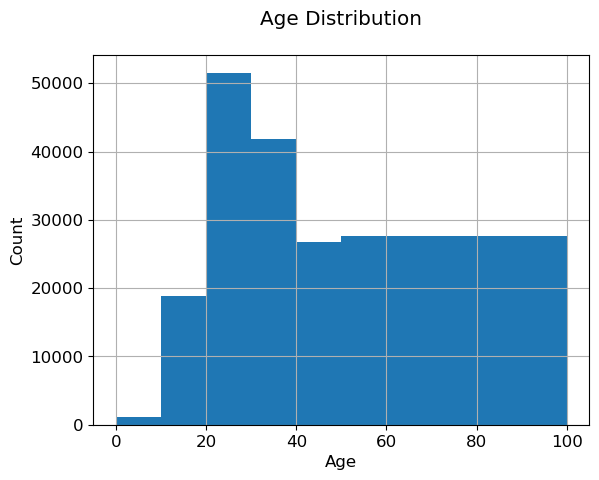

In [195]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In the plot below, we have seen the distribution of user ratings. This bar chat shows the number of books rated by each user. It has been seen from the graph that it is (positive)right skewed. Most users rate around 20 books, with a fewer rating reaching to the 10000 or more books.

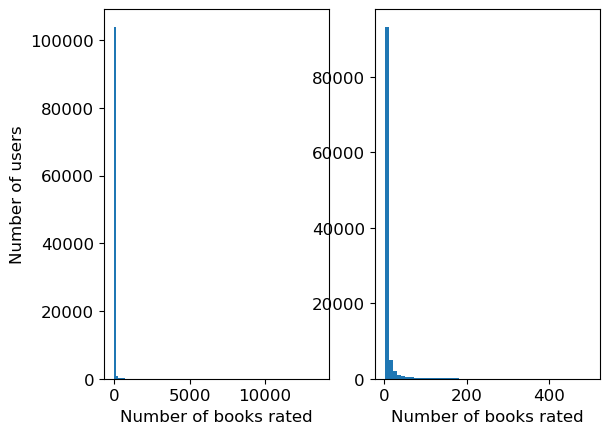

In [196]:
ratings_by_user = ratings["User-ID"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2)
# Plot all the data
ax1.hist(ratings_by_user,bins=100)
ax1.set_xlabel('Number of books rated')
ax1.set_ylabel('Number of users')
# Zoom in 
ax2.hist(ratings_by_user,bins=50,range=(min(ratings_by_user),500))
ax2.set_xlabel('Number of books rated')
plt.show()

# Methods

There are methods which have been applied to the dataset for getting the recommendation system of the books in many ways.

## Rating Counts based Recommendation of books

From the ratings dataset, we get the counts on the basis of each of the ISBN. The book with ISBN 0971880107 receives the most rating counts. 

In [197]:
# ratings dataframe grouped by ISBN and its counts
rat_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
#Sorting the values of the rating count
rat_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [198]:
# Finding out what is name of this book
rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
# merging the rated books to ISBN column of books dataset
rated_books_summary = pd.merge(rated_books, books, on='ISBN')
# See the summary of most rated books
rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


With the help of rating count, it can be shown that those books can be famous which have high ratings so we can recommend on the basis of that rating. 

# Popularity Based Recommendation System

In [199]:
#merges the 'ratings' and 'books' datasets based on the 'ISBN' column, combining the rating information with the corresponding book details.
name_with_ratings= ratings.merge(books,on='ISBN')
name_with_ratings.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [200]:
rating_df = name_with_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
#renames the 'Book-Rating' column in the 'rating_df' DataFrame to 'num_ratings' 
rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [201]:
avg_rating = name_with_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating

/var/folders/qs/7h062p450sdb_ncy2h6f4_3c0000gq/T/ipykernel_18892/2158557364.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = name_with_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250
1,Always Have Popsicles,0.000
2,Apple Magic (The Collector's series),0.000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000
...,...,...
241066,Ã?Â?lpiraten.,0.000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250
241068,Ã?Â?sterlich leben.,7.000
241069,Ã?Â?stlich der Berge.,2.667


In [202]:
#merges the 'popular' DataFrame with the 'books' dataset based on the 'bookTitle' column. It then drops any duplicate rows based on the 'bookTitle' column and selects specific columns 
popular_dta = rating_df.merge(avg_rating,on='Book-Title')

popular_dta

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250
1,Always Have Popsicles,1,0.000
2,Apple Magic (The Collector's series),1,0.000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250
241068,Ã?Â?sterlich leben.,1,7.000
241069,Ã?Â?stlich der Berge.,3,2.667


In [203]:
popular = popular_dta[popular_dta['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df = popular.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','num_ratings','avg_rating']]


In [204]:
popular_df['Book-Title'][0]


'Harry Potter and the Prisoner of Azkaban (Book 3)'

## Correlation Based Recommendation system of books

Correlation is the other way of seeing the recommendation of the books. By seeing the books who are more correlated with each other we can get their counts on the basis of that. The main purpose of taking book rating along with rating count is that if rating count is not highly rated at all but the rating of that book is higher then it will not be a better system.



In [205]:
# along with ratings count find the mean of those ratings
rating_avg1= pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())

rating_avg1['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
rating_avg1.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.020,2502
0316666343,4.469,1295
0385504209,4.652,883
0060928336,3.448,732
0312195516,4.335,723


In [206]:
# users with less than 200 rating and books less than 100 ratings are excluded
#Counts of the user ID
counts1 = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(counts[counts >= 100].index)]

In [207]:
# Making the rating matrix
# pivot converts the rating table to 2D matrix
pivot_rating = ratings.pivot(index='User-ID', columns='ISBN')['Book-Rating']
userID1 = pivot_rating.index
ISBN1 = pivot_rating.columns
print(pivot_rating.shape)
pivot_rating.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# corelating the pivot rating to the bones book 
ratings_of_bones = pivot_rating['0316666343']
# corrwith function finds the correlation between two data frames
bones_similar = pivot_rating.corrwith(ratings_of_bones)
bones_corr = pd.DataFrame(bones_similar, columns=['pearsonR'])
# Dropping all the NAN calues
bones_corr.dropna(inplace=True)
#Joining all the correlation with average rating
corr_summ = bones_corr.join(rating_avg1['ratingCount'])
corr_summ[corr_summ['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Applications/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
ISBN,,
0316666343,1.000,1295
0312291639,0.472,354
0316601950,0.434,568
0446610038,0.430,391
0446672211,0.421,585
0385265700,0.352,319
0345342968,0.317,321
0060930535,0.310,494
0375707972,0.308,354


In all the above process, the correlation is based on ratings. What ever book we include, it will correlate with all the other books in pivot rating table and find the values from 0 to 1. If the value is close to zero, it means it is not correlated. The more it is nearer to one, the more it will be correlated. It will follow pearson method of correlation. IT values ranging from -1 to +1. So correlation is found along with rating count and average rating. 

In [209]:
# to see all the names of the books   
remainingbooks_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
correlated_books = pd.merge(remainingbooks_corr_to_bones, books, on='ISBN')
correlated_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...


## Collaborative Filtering Using k-Nearest Neighbors (kNN)

Collaborative filtering aims to predict user preferences based on the behavior and preferences of similar users. Collaborative filtering using k-Nearest Neighbors is a powerful technique for providing personalized recommendations. kNN is a memory-based algorithm that finds the k most similar users (or items) to a target user (or item).
The similarity can be measured using distance metrics like cosine similarity or Euclidean distance.
Once the most similar neighbors are identified, their preferences are used to make recommendations to the target user.

In [211]:
#merging of ratings and books dataset on basis of ISBN
combine_bookrating = pd.merge(ratings, books, on='ISBN')
combine_bookrating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [212]:
# Adding anew column for total rating count and group by book titles
combine_book_rating = combine_bookrating.dropna(axis = 0, subset = ['Book-Title'])

bookrating_Count1 = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
bookrating_Count1.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [213]:
#Combining and merging the rating data with total rating count data
rating_with_totalRating_Count = combine_book_rating.merge(bookrating_Count1, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRating_Count.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


In [214]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(bookrating_Count1['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [215]:
print(bookrating_Count1['totalRatingCount'].quantile(np.arange(.9, 1, .01)))


0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [235]:
# Setting the threshold for the popular books 
popular_books_threshold = 50
rating_pop_book1= rating_with_totalRating_Count.query('totalRatingCount >= @popular_books_threshold')


In [236]:
rating_pop_book1.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


In [231]:

rating_pop_book1.shape


(62149, 5)

## Recommendation for Users in UK and Canada

This is basically the analysis including only users based on the location. For this purpose, we chose UK and Canada users for recommendation. The K-nearest neighbors algorithm is implemented using the NearestNeighbors class from sklearn.neighbors.
The algorithm uses the cosine distance metric and the brute-force algorithm. The model is trained on the "uk_canada_user_rating_matrix" sparse matrix.

To find the nearest neighbors, the cosine similarity metric was used. The cosine similarity calculates the similarity between rating vectors. The sklearn.neighbors library was utilized, and the kNN model was fitted to the data. It was necessary to transform the rating information into a matrix representation, where each row corresponded to a book and each column to a user. There were zeros to fill in the missing values. In order to distinguish popular books from obscure ones, the overall rating count for each book was determined. 



In [219]:

combine= rating_pop_book1.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
#combining the data based for the users in UK and Canada
uk_canada_user_rating = combine[combine['Location'].str.contains("united Kingdom|canada")]
#Dropping the age column
uk_canada_user_rating=uk_canada_user_rating.drop('Age', axis=1)
uk_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,bookTitle,totalRatingCount,Location
9,28204,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"south ohio, nova scotia, canada"
13,43246,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"toronto, ontario, canada"
31,119575,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"north vancouver, british columbia, canada"
53,188010,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"edmonton, alberta, canada"
56,198711,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"little canada, minnesota, usa"


### Implementing KNN

Since we'll be measuring the separations between the rating vectors, we transform our table to a 2D matrix and replace the missing values with zeros. The values (ratings) of the matrix dataframe are then converted into a scipy sparse matrix for faster calculations.

Identifying Nearby Neighbours Sklearn.neighbors and unsupervised methods are used. We use the "brute" technique to find the nearest neighbours, and we set the "metric=cosine" option to force the programme to determine the cosine similarity between the rating vectors. We finally fitted the model.


In [220]:
from scipy.sparse import csr_matrix
# DRopping the duplicates in USER ID
uk_canada_user_rating = uk_canada_user_rating.drop_duplicates(['User-ID', 'bookTitle'])
# Pivot table based on book title
uk_canada_user_rating_pivot = uk_canada_user_rating.pivot(index = 'bookTitle', columns = 'User-ID', values = 'Book-Rating').fillna(0)
# creating the matrix
uk_canada_user_rating_matrix = csr_matrix(uk_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

#implementing K nearest neighbour
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(uk_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [221]:
# selects a query index from the user-book ratings matrix 
uk_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 7., 0., 0., 0.]])

In [222]:
query_index = np.random.choice(uk_canada_user_rating_pivot.shape[0])
print(query_index)
#  trained KNN model model_knn to find the k-nearest neighbors (in this case, k=6) to the user at the selected query index. seeeing the 6 neighbours
distances, indices = model_knn.kneighbors(uk_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

435


In [223]:
uk_canada_user_rating_pivot.index[query_index]


'Sea Swept (Quinn Brothers (Paperback))'

In [224]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(uk_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, uk_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Sea Swept (Quinn Brothers (Paperback)):

1: Carnal Innocence, with distance of 0.0:
2: Tears of the Moon (Irish Trilogy), with distance of 0.0:
3: Heart of the Sea (Irish Trilogy), with distance of 0.0:
4: Sea Swept (Quinn Brothers (Paperback)), with distance of 0.0:
5: Blessings, with distance of 0.0:


In this case, the recommended books have a distance of 0.0, which indicates that they are the closest neighbors to the query book based on user ratings. The books "Carnal Innocence," "Tears of the Moon (Irish Trilogy)," "Heart of the Sea (Irish Trilogy)," "Sea Swept (Quinn Brothers (Paperback))," and "Blessings" are recommended for the user who is interested in "Sea Swept (Quinn Brothers (Paperback))."

The distance measure used in KNN represents the similarity between the books' ratings profiles. A distance of 0.0 suggests that the ratings profiles of the recommended books are identical to that of the query book.

# Conclusion

In the conclusion, we can conclude that our whole project was to make the system for the users which can recommend them books. For that purpose, we did this in different ways, rating count based recommendation, correlation based recommendation, popularity based recommendation and using K nearest neighbours. Each of them do the recommendation in different ways and the best one should be using K nearest neighbour. 
The top 50 books based on the quantity and average of ratings were effectively identified by the popularity-based recommendation analysis. These results might be used as a springboard for additional research or to offer consumers recommendations. It is crucial to remember that since popularity-based recommendations do not take into account specific user preferences, they may have limits. To propose books, the collaborative filtering approach was used. This method makes predictions based on the average rating of the top k closest neighbours after identifying comparable users based on their book ratings.

Book suggestions could be produced based on user ratings and user similarities when the kNN model was successfully trained on the dataset. When it came to giving readers personalised book recommendations, the algorithm displayed encouraging results. The kNN algorithm-based book recommendation system performed well at providing users with recommendations for books that are specific to them. The algorithm was able to recognise similar users and generate precise predictions based on their past ratings by utilising collaborative filtering and cosine similarity. To further increase suggestion accuracy and user experience, additional features could be included, such as book genres or user preferences.

The correlation-based book recommendation system proved to be a valuable tool in suggesting personalized book recommendations to users. By utilizing correlation coefficients between users' ratings, the system identified similar users and recommended books based on their preferences. 



# Reference for Dataset

https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset